In [1]:
# carregando o arquivo .mat
import scipy.io
mat = scipy.io.loadmat('IN_OUT_PA.mat')

in_data = mat['in'] 
out_data = mat['out']

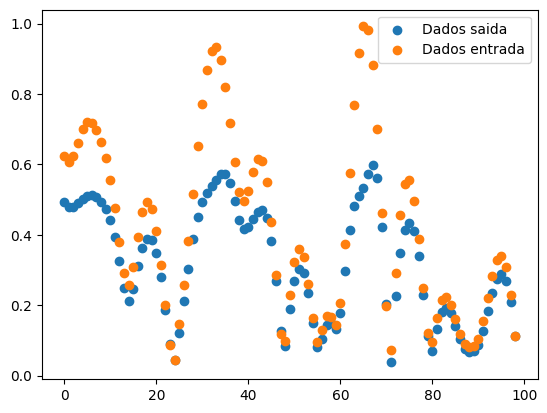

In [2]:
import matplotlib.pyplot as plt
x = range(0,len(in_data))

plt.scatter(x,out_data, label='Dados saida')
plt.scatter(x, in_data,  label='Dados entrada')
plt.legend()
plt.show()

In [3]:
import numpy as np
# definir valores de P e M
P = 9 
M = 4

n = len(in_data) # número total de amostras
XX = np.zeros((n - M, P))
for i in range(M, n):
    XX[i-M, 0] = in_data[i][0]
    for j in range(1, P):
        XX[i-M, j] = in_data[i-j][0] ** j


coefficients, _, _, _  = np.linalg.lstsq(XX, out_data[M:], rcond=None)

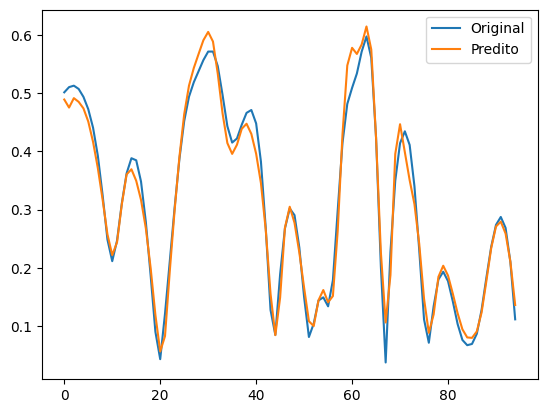

In [4]:
predicted = XX @ coefficients
plt.plot(out_data[M:], label='Original')
plt.plot(predicted, label='Predito')
plt.legend()
plt.show()